# Instrument Classification

In [2]:
# Import libraries
import os, fnmatch
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

## Pre Processing

In [3]:
# Importing datasets from files to array
labels = []
files = []

# Load guitar data and append a new guitar label & file path 
# for each '.wav' file found
guitarPath='Datasets/guitar/'
for file in os.listdir(guitarPath):
    if fnmatch.fnmatch(file, '*.wav'):
        labels.append('guitar')
        files.append(guitarPath+file)
        #print(file)

# Load piano data and append a new piano label & file path 
# for each '.wav' file found 
pianoPath='Datasets/piano/'
for file in os.listdir(pianoPath):
    if fnmatch.fnmatch(file, '*.wav'):
        labels.append('piano')
        files.append(pianoPath+file)
        #print(file)
        
#len(files)
#files
#labels

In [4]:
# Encode target values found in 'labels' array
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
Y = le.transform(labels)

In [5]:
# Load files from 'files' array & extract MFCC data
X = []
for file in (files):
    data, sr = librosa.load(file)
    if len(data) is None:  # Catch error for incorrect file loading
        print("Error loading")
        break
    mfccs = librosa.feature.mfcc(data, n_mfcc=13, sr=sr)
    features = np.mean(mfccs,1)
    X.append(features)  # Append MFCC audio features to X data array

In [12]:
# Split the X and Y data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [13]:
# Data scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.fit_transform(X_test)

## Neural Network Model

In [19]:
# Apply the Neural Netwrok learning model and train it
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=1000)
model.fit(scaled_X_train, Y_train)

# Get model predictions
pred_Y_train = model.predict(scaled_X_train)
pred_Y_test = model.predict(scaled_X_test)

# Evaluate the model
scaledTrainScore="Scaled train score = {:0.3f}".format(model.score(scaled_X_train, Y_train))
scaledTestScore="Scaled test score = {:0.3f}".format(model.score(scaled_X_test, Y_test))

In [20]:
# Basic model accuracy
print(scaledTrainScore)
print(scaledTestScore)

Scaled train score = 1.000
Scaled test score = 0.982


In [21]:
# Evaluate the model using default classification report
from sklearn.metrics import classification_report
target_names = ['guitar','violin']
print(classification_report(Y_test, pred_Y_test, target_names=target_names))

              precision    recall  f1-score   support

      guitar       1.00      0.96      0.98        23
      violin       0.97      1.00      0.99        34

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



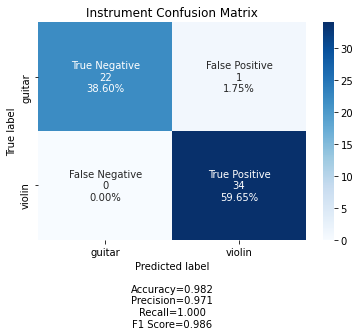

In [22]:
# Plot Confusion Matrix
from cf_matrix import make_confusion_matrix  # Import library
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(Y_test, pred_Y_test) 
cfm_labels = ['True Negative','False Positive','False Negative','True Positive']  # set cfm labels
categories = ['guitar','violin'] # Set group names based on Y data labels
make_confusion_matrix(cfm,  # Format confusion matrix using custom library
                      title='Instrument Confusion Matrix',
                      group_names=cfm_labels,
                      categories=categories,
                      sum_stats=True,
                      percent=True)

In [23]:
# Use of Cross validation with a new model

X_scaled = sc.fit_transform(X)  # scale all the X data
from  sklearn.model_selection import cross_val_score  # Import cross validation methods

# Create the second Logistic regression model
crossValModel = MLPClassifier(max_iter=5000, alpha=0.05, hidden_layer_sizes=(200,), solver='lbfgs')  

# Use cross_val_score to calculate the accuracy of the model using cross validation
crossValScore = cross_val_score(crossValModel, X_scaled, Y, cv = 10, scoring='accuracy')
print("Cross Validation Model accuracy: ",crossValScore.mean()) # print mean average of the 10 partitianed scores

Cross Validation Model accuracy:  0.9894736842105264


## Logistical Regression Model

In [11]:
# Apply the Logistical regression learning model and train it
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(scaled_X_train, Y_train)  # Train the model using the training data

# Get model predictions
pred_Y_train = model.predict(scaled_X_train)
pred_Y_test = model.predict(scaled_X_test)

# Evaluate the model
scaledTrainScore="Scaled train score = {:0.3f}".format(model.score(scaled_X_train, Y_train))
scaledTestScore="Scaled test score = {:0.3f}".format(model.score(scaled_X_test, Y_test))

In [12]:
# Basic model accuracy
print(scaledTrainScore)
print(scaledTestScore)

Scaled train score = 1.000
Scaled test score = 1.000


In [13]:
# Evaluate the model using default classification report
from sklearn.metrics import classification_report
target_names = ['guitar','violin']
print(classification_report(Y_test, pred_Y_test, target_names=target_names))

              precision    recall  f1-score   support

      guitar       1.00      1.00      1.00        23
      violin       1.00      1.00      1.00        34

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



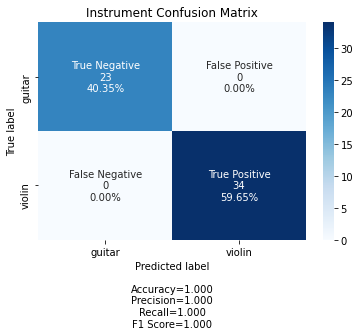

In [14]:
# Plot Confusion Matrix
from cf_matrix import make_confusion_matrix  # Import library
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(Y_test, pred_Y_test) 
cfm_labels = ['True Negative','False Positive','False Negative','True Positive']  # set cfm labels
categories = ['guitar','violin'] # Set group names based on Y data labels
make_confusion_matrix(cfm,  # Format confusion matrix using custom library
                      title='Instrument Confusion Matrix',
                      group_names=cfm_labels,
                      categories=categories,
                      sum_stats=True,
                      percent=True)

In [15]:
# Use of Cross validation with a new model

X_scaled = sc.fit_transform(X)  # scale all the X data
from  sklearn.model_selection import cross_val_score  # Import cross validation methods

# Create the second Logistic regression model
crossValModel = LogisticRegression()  

# Use cross_val_score to calculate the accuracy of the model using cross validation
crossValScore = cross_val_score(crossValModel, X_scaled, Y, cv = 10, scoring='accuracy')
print("Cross Validation Model accuracy: ",crossValScore.mean()) # print mean average of the 10 partitianed scores

Cross Validation Model accuracy:  0.9947368421052631


In [16]:
gridSearchModel = LogisticRegression()   # create a new logistic regression model for grid search

# create dictionary of parameters for logistical regression
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
     'C' : [10.0, 1.0, 0.1],
     'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag'],
     'max_iter' : [250, 500, 750, 1000]}
]

# Grid Seach with 10 fold CV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(gridSearchModel, param_grid, cv=10, verbose=True, n_jobs=-1, scoring='accuracy')
grid.fit(X_scaled, Y)  # fit the instsantiated grid with scaled data

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:   15.0s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [10.0, 1.0, 0.1],
                          'max_iter': [250, 500, 750, 1000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga',
                                     'sag']}],
             scoring='accuracy', verbose=True)

In [17]:
# Accuracy of the grid search hyper-parameter tuned model
print (grid.best_params_)
print (grid.best_estimator_)
print ("Best Tuned Accuracy: {:.6f}".format(grid.best_score_))

{'C': 1.0, 'max_iter': 250, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(max_iter=250, penalty='l1', solver='liblinear')
Best Tuned Accuracy: 1.000000


# Support Vector Machine

In [14]:
from sklearn.svm import SVC
model = SVC()
model.fit(scaled_X_train, Y_train)  # Train the model using the training data

# Get model predictions
pred_Y_train = model.predict(scaled_X_train)
pred_Y_test = model.predict(scaled_X_test)

# Evaluate the model
scaledTrainScore="Scaled train score = {:0.3f}".format(model.score(scaled_X_train, Y_train))
scaledTestScore="Scaled test score = {:0.3f}".format(model.score(scaled_X_test, Y_test))

In [15]:
# Basic model accuracy
print(scaledTrainScore)
print(scaledTestScore)

Scaled train score = 1.000
Scaled test score = 1.000


In [16]:
# Use of Cross validation with a new model

X_scaled = sc.fit_transform(X)  # scale all the X data
from  sklearn.model_selection import cross_val_score  # Import cross validation methods

# Create the second Logistic regression model
crossValModel = SVC()

# Use cross_val_score to calculate the accuracy of the model using cross validation
crossValScore = cross_val_score(crossValModel, X_scaled, Y, cv = 10, scoring='accuracy')
print("Cross Validation Model accuracy: ",crossValScore.mean()) # print mean average of the 10 partitianed scores

Cross Validation Model accuracy:  1.0
